In [1]:
# Download libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
uber_data=pd.read_csv('/kaggle/input/uberdrives/My Uber Drives - 2016.csv')

In [3]:
print(uber_data.isnull().sum())
uber_data=uber_data.dropna()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [4]:
uber_data.columns = [col.strip("*") for col in uber_data.columns]

In [5]:
# Let's get a snapshot of the dataframe
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [6]:
#make string as datetime to identify individual components easily
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format="%m/%d/%Y %H:%M")
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format="%m/%d/%Y %H:%M")

uber_data['HOUR']= [x.hour for x in uber_data['START_DATE']]
uber_data['DAY']= [x.day for x in uber_data['START_DATE']]
uber_data['MONTH']= [x.month for x in uber_data['START_DATE']]
uber_data['WEEKDAY']= [calendar.day_name[x.dayofweek] for x in uber_data['START_DATE']]
uber_data['DAY_OF_WEEK']= [x.dayofweek for x in uber_data['START_DATE']]

In [7]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

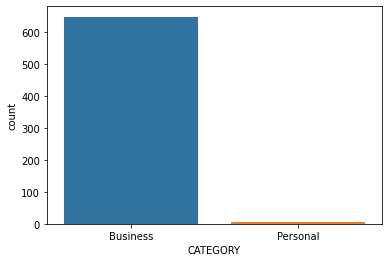

In [8]:
sns.countplot(x='CATEGORY',data=uber_data)

Riders significantly used Uber for business purposes as opposed to personal.

<AxesSubplot:xlabel='count', ylabel='PURPOSE'>

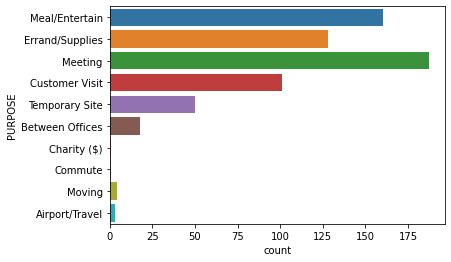

In [9]:
sns.countplot(y='PURPOSE',data=uber_data)

The most rides were to get to meetings.

<AxesSubplot:ylabel='Frequency'>

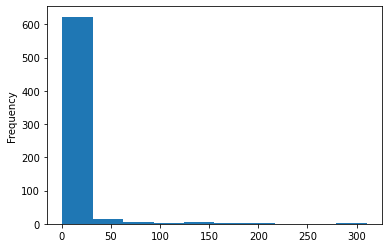

In [10]:
uber_data['MILES'].plot.hist()

Text(0.5, 1.0, 'Number of trips Vs hours')

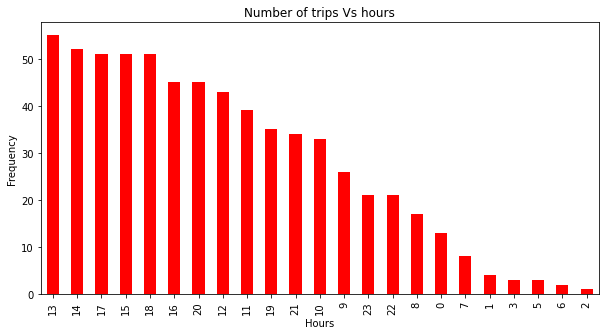

In [11]:
hours = uber_data['HOUR'].value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

Most trips are between afternoon and evening (1PM-6PM)

Text(0.5, 1.0, 'Number of trips Vs days')

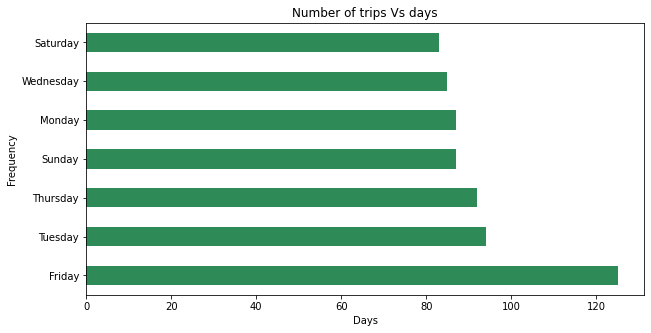

In [12]:
days = uber_data['WEEKDAY'].value_counts()
days.plot(kind='barh',color='seagreen',figsize=(10,5))
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Number of trips Vs days')

Most trips are on Friday.

Text(0.5, 1.0, 'Number of trips Vs months')

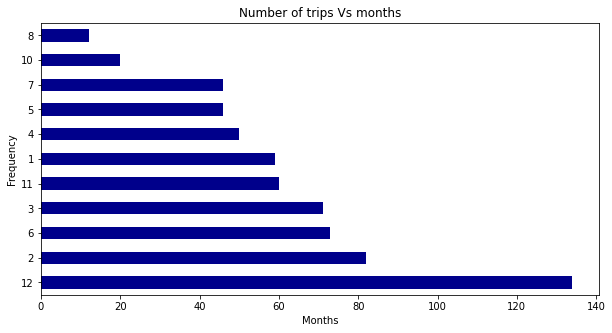

In [13]:
months = uber_data['MONTH'].value_counts()
months.plot(kind='barh',color='darkblue',figsize=(10,5))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Number of trips Vs months')

Most trips are in December

Text(0.5, 1.0, 'Number of trips Vs days of december')

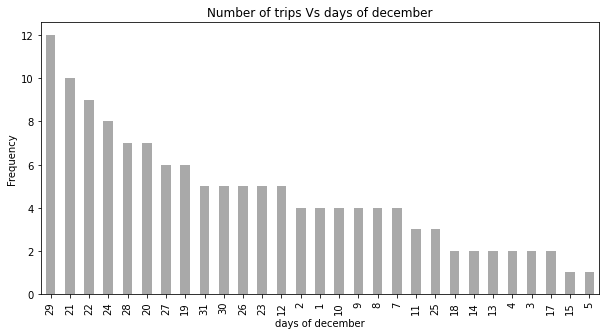

In [14]:
months = uber_data['DAY'][uber_data['MONTH']==12].value_counts()
months.plot(kind='bar',color='darkgray',figsize=(10,5))
plt.xlabel('days of december')
plt.ylabel('Frequency')
plt.title('Number of trips Vs days of december')

Most trips in December are in the holiday season

Text(0.5, 1.0, 'Pickup point Vs Frequency')

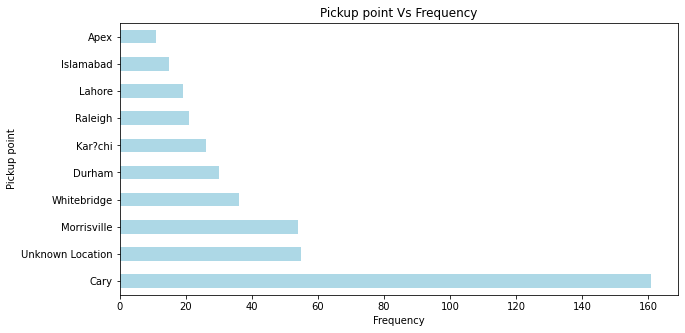

In [15]:
months = uber_data['START'].value_counts().nlargest(10)
months.plot(kind='barh',color='lightblue',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Pickup point')
plt.title('Pickup point Vs Frequency')

Text(0.5, 1.0, 'End point Vs Frequency')

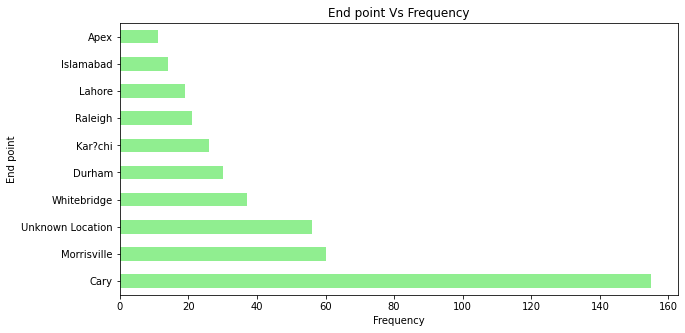

In [16]:
months = uber_data['STOP'].value_counts().nlargest(10)
months.plot(kind='barh',color='lightgreen',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('End point')
plt.title('End point Vs Frequency')

Text(0.5, 1.0, 'Trips Vs Frequency')

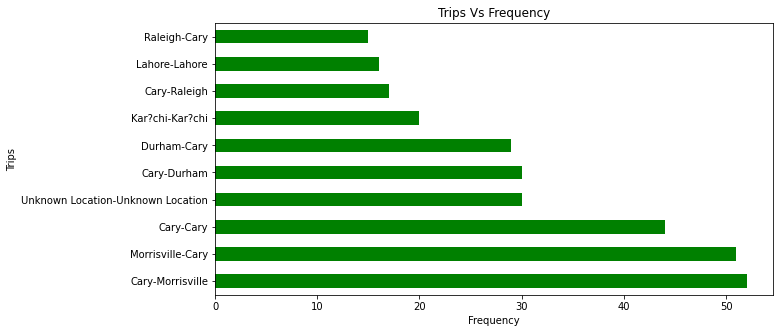

In [17]:
trips = uber_data['START']+'-'+uber_data['STOP']
trips = trips.value_counts().nlargest(10)
trips.plot(kind='barh',color='green',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Trips')
plt.title('Trips Vs Frequency')

## Boston Uber Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data=pd.read_csv('/kaggle/input/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv')

In [20]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## Dropping extra features for simplicity

In [21]:
extra_cols =  ['apparentTemperature', 'precipIntensity', 'humidity', 'windSpeed', 
              'windGust', 'apparentTemperatureHigh', 'dewPoint','precipIntensityMax',
              'apparentTemperatureMax', 'cloudCover', 'moonPhase', 
              'windGustTime', 'visibility', 'temperatureHighTime',
              'temperatureLowTime', 'apparentTemperatureHighTime',
              'apparentTemperatureLow', 'apparentTemperatureLowTime',
              'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMin',
              'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
              'windBearing', 'uvIndex', 'visibility.1', 'ozone',
              'sunriseTime', 'sunsetTime', 'uvIndexTime']
data=data.drop(extra_cols, axis=1)

Remove invalid cells

In [22]:
print(data.isnull().sum())
data=data.dropna()

id                       0
timestamp                0
hour                     0
day                      0
month                    0
datetime                 0
timezone                 0
source                   0
destination              0
cab_type                 0
product_id               0
name                     0
price                55095
distance                 0
surge_multiplier         0
latitude                 0
longitude                0
temperature              0
short_summary            0
long_summary             0
precipProbability        0
temperatureHigh          0
temperatureLow           0
icon                     0
pressure                 0
temperatureMin           0
temperatureMax           0
dtype: int64


### Perform EDA

In [23]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

Text(0.5, 1.0, 'Number of trips Vs hours')

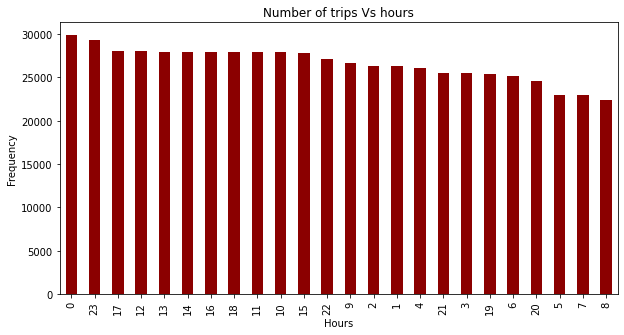

In [24]:
hours = data['hour'].value_counts()
hours.plot(kind='bar',color='darkred',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')
#most trips are in the late night or evening

In [25]:
day_week = [calendar.day_name[x.dayofweek] for x in 
            pd.to_datetime(data['datetime'], format="%Y/%m/%d %H:%M:%S")]
day_week = pd.Series(day_week)

Text(0.5, 1.0, 'Number of trips Vs days')

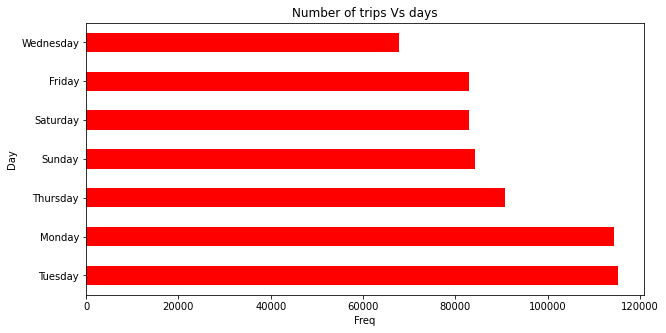

In [26]:
days = day_week.value_counts()
days.plot(kind='barh',color='red',figsize=(10,5))
plt.xlabel('Freq')
plt.ylabel('Day')
plt.title('Number of trips Vs days')

Text(0.5, 1.0, 'Number of trips Vs months')

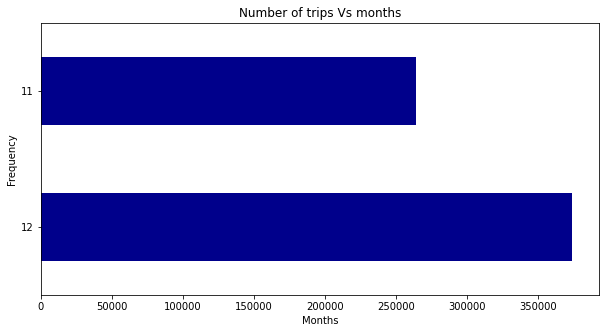

In [27]:
months = data['month'].value_counts()
months.plot(kind='barh',color='darkblue',figsize=(10,5))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Number of trips Vs months')

The most trips take place in December.

Text(0.5, 1.0, 'Number of trips Vs days of december')

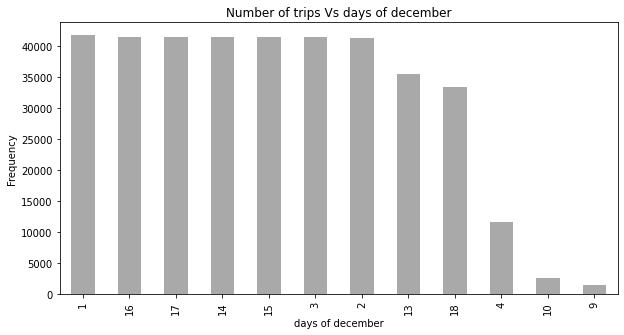

In [28]:
months = data['day'][data['month']==12].value_counts()
months.plot(kind='bar',color='darkgray',figsize=(10,5))
plt.xlabel('days of december')
plt.ylabel('Frequency')
plt.title('Number of trips Vs days of december')

Most trips take place in December are in the holiday season.

Text(0.5, 1.0, 'Pickup point Vs Frequency')

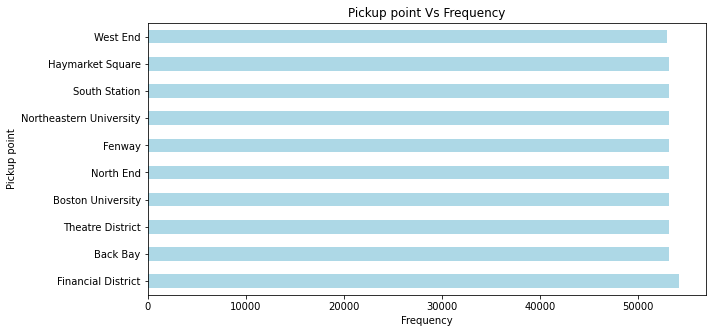

In [29]:
source = data['source'].value_counts().nlargest(10)
source.plot(kind='barh',color='lightblue',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Pickup point')
plt.title('Pickup point Vs Frequency')

Text(0.5, 1.0, 'End point Vs Frequency')

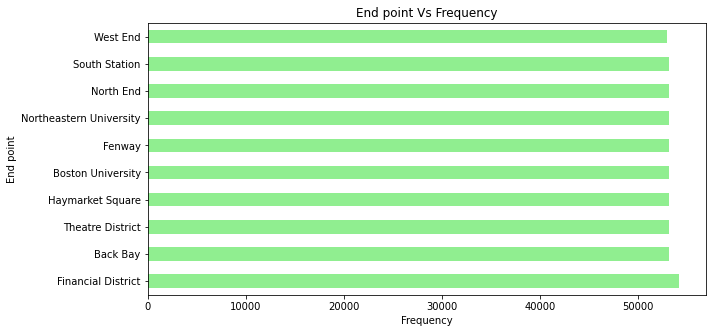

In [30]:
months = data['destination'].value_counts().nlargest(10)
months.plot(kind='barh',color='lightgreen',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('End point')
plt.title('End point Vs Frequency')

Text(0.5, 1.0, 'Trips Vs Frequency')

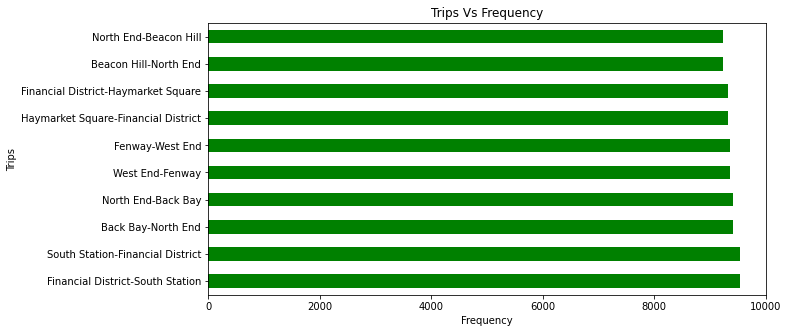

In [31]:
trips = data['source']+'-'+data['destination']
trips = trips.value_counts().nlargest(10)
trips.plot(kind='barh',color='green',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Trips')
plt.title('Trips Vs Frequency')

<AxesSubplot:xlabel='count', ylabel='name'>

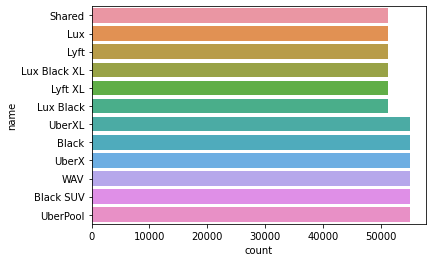

In [32]:
sns.countplot(y='name',data=data)

### Use ML to predict price

In [33]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [34]:
data['id']= label_encoder.fit_transform(data['id']) 
data['datetime']= label_encoder.fit_transform(data['datetime']) 
data['timezone']= label_encoder.fit_transform(data['timezone'])
data['destination']= label_encoder.fit_transform(data['destination']) 
data['product_id']= label_encoder.fit_transform(data['product_id'])
data['short_summary']= label_encoder.fit_transform(data['short_summary'])
data['long_summary']= label_encoder.fit_transform(data['long_summary'])
data['name']= label_encoder.fit_transform(data['name'])

In [35]:
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
  print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
UberPool --> 8
UberX --> 9
UberXL --> 10
WAV --> 11


In [36]:
data['source']= label_encoder.fit_transform(data['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [37]:
data['icon']= label_encoder.fit_transform(data['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [38]:
data['cab_type']= label_encoder.fit_transform(data['cab_type'])

print("Class mapping of cab_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of cab_type: 
Lyft --> 0
Uber --> 1


In [39]:
data.dtypes

id                     int64
timestamp            float64
hour                   int64
day                    int64
month                  int64
datetime               int64
timezone               int64
source                 int64
destination            int64
cab_type               int64
product_id             int64
name                   int64
price                float64
distance             float64
surge_multiplier     float64
latitude             float64
longitude            float64
temperature          float64
short_summary          int64
long_summary           int64
precipProbability    float64
temperatureHigh      float64
temperatureLow       float64
icon                   int64
pressure             float64
temperatureMin       float64
temperatureMax       float64
dtype: object

In [40]:
len(data[data['cab_type']==1])

330568

In [41]:
X = data[data['cab_type']==1].drop(['price', 'cab_type'], axis=1)
y = data[data['cab_type']==1]['price']

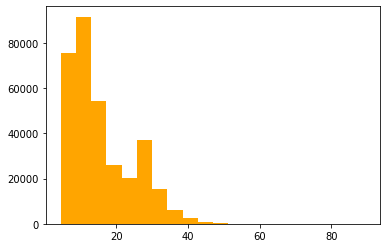

In [42]:
plt.hist(y, bins=20, color='orange')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import ensemble

def train_test_models(X_train, y_train, X_test, y_test):
  print("Linear Regression...")
  lr_model = LinearRegression()
  lr_model = lr_model.fit(X_train, y_train)
  print(lr_model.score(X_test, y_test))

  print("Decision Tree...")
  dt_model = DecisionTreeRegressor(random_state = 0, max_depth=10)  
  dt_model.fit(X_train , y_train) 
  print(dt_model.score(X_test, y_test))
  
  print("Random Forest...")
  random_forest = RandomForestRegressor(n_estimators = 20, random_state = 0, max_depth=10) 
  random_forest.fit(X_train[:50000], y_train[:50000])
  print(random_forest.score(X_test, y_test))
  
  print("GBM...")
  gbm = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5)
  gbm.fit(X_train[:50000], y_train[:50000])
  print(gbm.score(X_test, y_test))

  return [lr_model, dt_model, random_forest, gbm]

def feature_eliminate(trained_model, X, y, n_features=40):
  rfe = RFE(trained_model, n_features_to_select=n_features)
  rfe = rfe.fit(X, y)
  X_new = X[X.columns[rfe.support_]]
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      test_size = 0.2, 
                                                      random_state = 0)
  new_fit = trained_model.fit(X_train, y_train)
  print(new_fit.score(X_test, y_test))

In [ ]:
model_list = train_test_models(X_train, y_train, X_test, y_test)

n_features = [5, 10, 15, 20]

for model in model_list:
  for nf in n_features:
    print(f"{model}->{nf} features")
    feature_eliminate(model, X, y, nf)

Linear Regression...
0.652462379685768
Decision Tree...
0.9486049123052473
Random Forest...
0.9477220114525389
GBM...
0.9500929257099655
LinearRegression()->5 features
0.6564219657294842
LinearRegression()->10 features
0.6564572682689509
LinearRegression()->15 features
0.6564359599010785
LinearRegression()->20 features
0.6564300847149338
DecisionTreeRegressor(max_depth=10, random_state=0)->5 features
0.9519683669372733
DecisionTreeRegressor(max_depth=10, random_state=0)->10 features
0.9498249233946504
DecisionTreeRegressor(max_depth=10, random_state=0)->15 features
0.9499194779842417
DecisionTreeRegressor(max_depth=10, random_state=0)->20 features
0.9500345298461782
RandomForestRegressor(max_depth=10, n_estimators=20, random_state=0)->5 features
